# AAM-IPL <Week-Number> <Topic-Name> - <Project-Name>
**Name of The Student**: <Student_Name> </br>
**Roll No.**: <Student-Roll_Number>> </br>
**Branch of Study**: <Student_Name> </br>
**Department**: <Student_department> </br>
**Semester**: <Student_Name> </br>
**Email**: <GPREC_Email_Address> </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu, CTO, Brillium Technologies </br>
**Program Coordinator**: Prof. V.Suresh, CSM, GPREC </br>

**Project Implementation Details**: </br>
<Project_Implementation_Details>


**AAM-IPL of GPREC is brought to you by Brillium Technologies.**

In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install ffmpeg-python

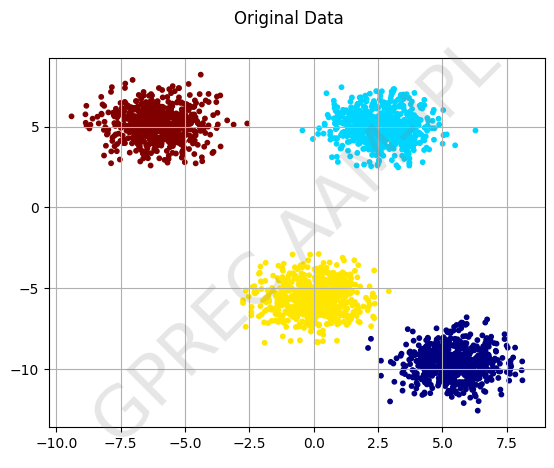

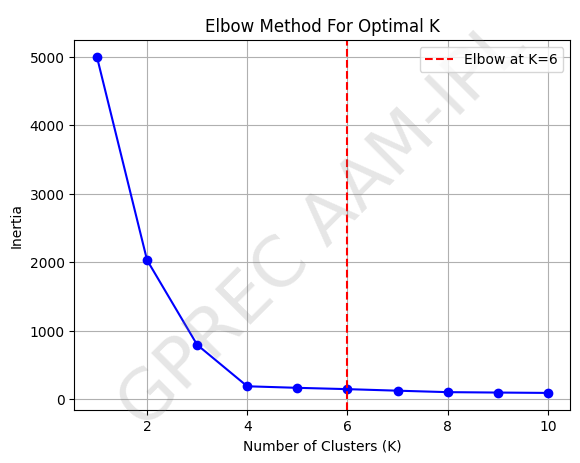

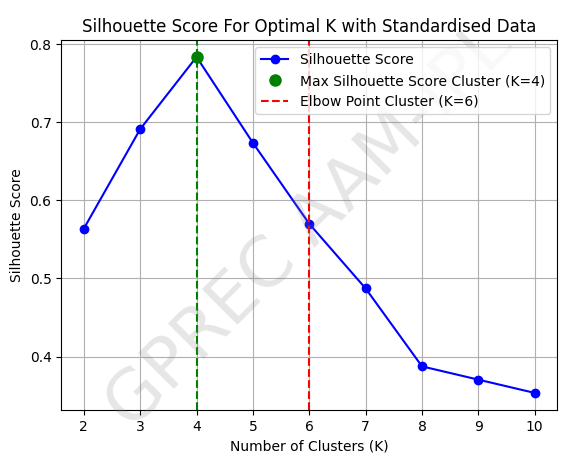

Inertia: 4910.884952291579
Silhouette Score: 0.7685062522619707


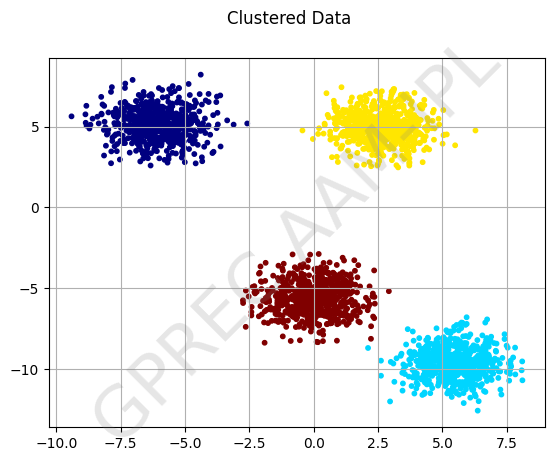

Inertia: 188.03059945582476
Silhouette Score: 0.7829928948967044


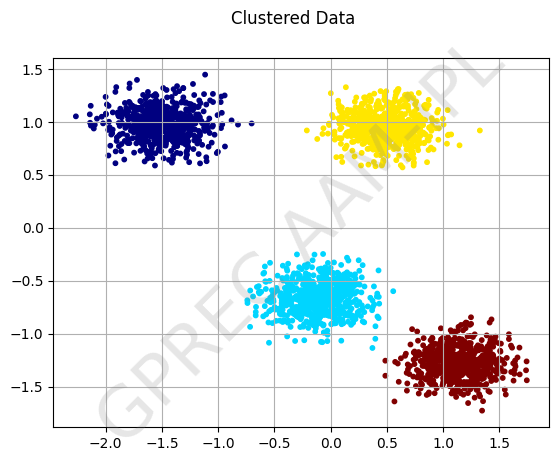

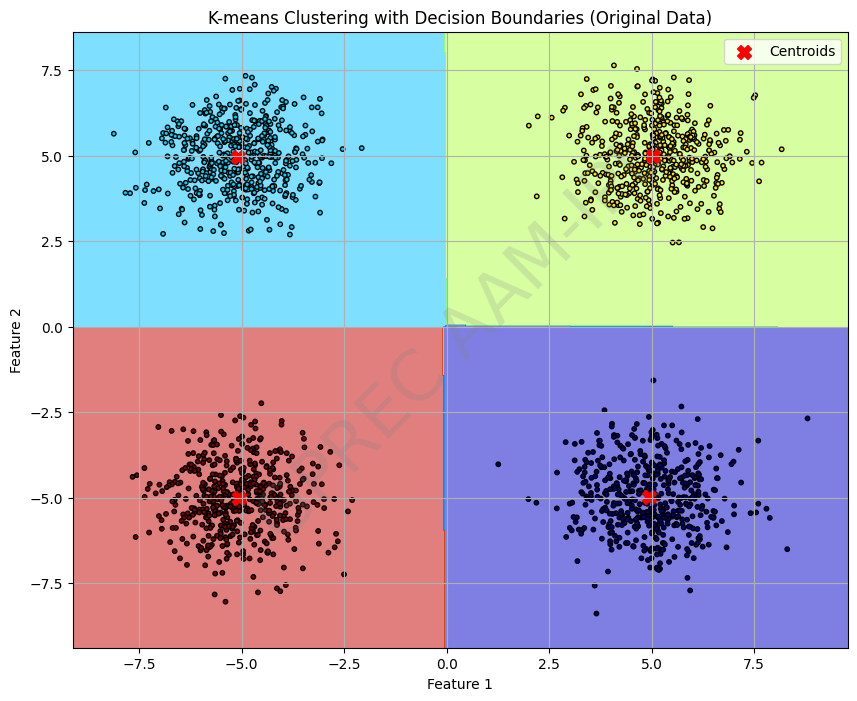

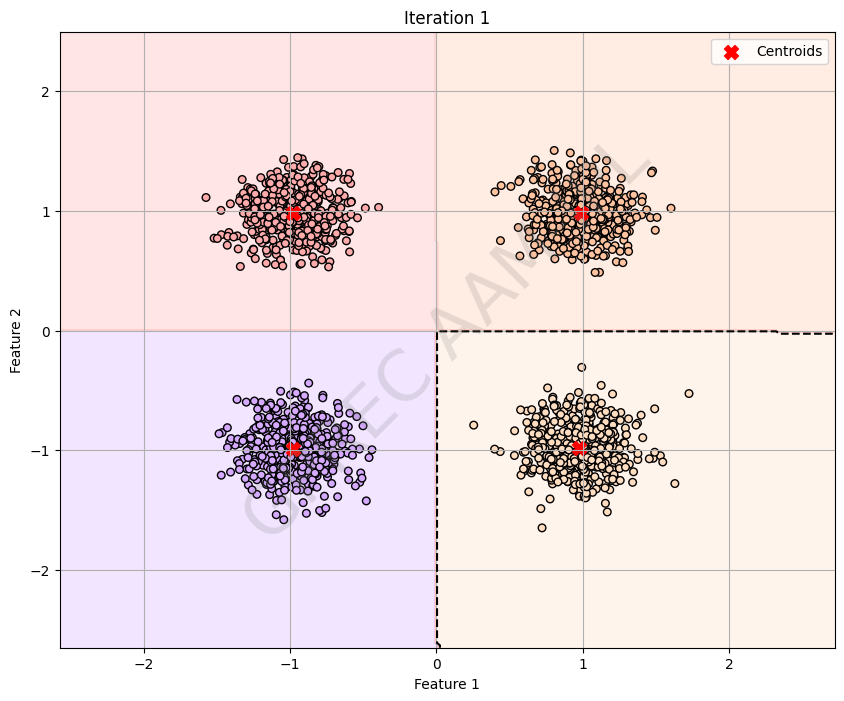

In [4]:
# Imports and config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import animation
from matplotlib.animation import FFMpegWriter

# Define the path to AAM-IPL watermark
watermark_path = 'AAM-IPL-Watermark-for-Plots.png'

# Load data and preprocess - Use PCA if needed, for dimensionality reduction


# Display data - scatter plot

# Standardize the data


# Determine the optimal number of clusters using elbow method

# Elbow method
"""
A common way to find the optimal number of clusters is by using the elbow method, which involves:
The elbow method steps are:
1. Choosing a range of cluster numbers to try (e.g., from 1 to 10).
2. For each cluster number, running the k-means algorithm and calculating the inertia (sum of squared distances between each point and its centroid).
3. Plotting the inertia values against the number of clusters.
4. Looking for an "elbow" in the plot, which represents the point where the decrease in inertia starts to stabilize.
5. Inertia is defined as the sum of squared distances between each point and its centroid. 
6. It can be calculated as follows:
    inertia = sum((X - centroid)^2)

A common way to find the elbow point from the set of inertia values is by analyzing the second derivative of the inertia, which represents the acceleration of the inertia changes. 
The elbow is generally where the acceleration is minimal, indicating the curve is flattening out.

"""
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the first and second derivative of inertia
inertia_diff = np.diff(inertia)
inertia_accel = np.diff(inertia_diff)

# To find the elbow, find the point where the second derivative is minimal
elbow_point = np.argmin(inertia_accel) + 2  # +2 to account for double offset from np.diff

plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)

# Highlight the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at K={elbow_point}')
plt.legend()

# Add watermark - AAM-IPL logo

plt.show()


# Plot quality of clustering - silhouette score with raw input data

"""
Silhouette score is a good measure of how well each data point fits into its assigned cluster, . 

The silhouette score is a measure of how well each data point fits into its assigned cluster and it is used to determine the optimal number of clusters. 
It ranges from -1 to 1.
 - 1 indicates that the data point is well clustered, 
 - 0 indicates that the data point is not well clustered, 
 - -1 indicates that the data point is far from its assigned cluster

The optimal K value is where the silhouette score reaches its maximum.

"""
silhouette_scores = []

# Initialize a variable to store the minimum silhouette score and corresponding k value
min_score = float('inf')
min_k = None

# Initialize a variable to store the maximum silhouette score and corresponding k value
max_score = -1  # Silhouette score range is [-1, 1], so start below the minimum possible score
max_k = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    # Check if the current score is the highest
    if score > max_score:
        max_score = score
        max_k = k

plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K with Standardised Data')
plt.grid(True)

# Highlight the point with the highest silhouette score
plt.plot(max_k, max_score, 'go', markersize=8, label=f'Max Silhouette Score Cluster (K={max_k})')

# Vertical line for the maximum silhouette score
plt.axvline(x=max_k, color='g', linestyle='--')

# Additional vertical line for elbow point
plt.axvline(x=6, color='r', linestyle='--', label=f'Elbow Point Cluster (K={elbow_point})')

plt.legend()

# Add watermark - AAM-IPL logo
plt.show()


# Predicted cluster scatter plot with raw input data

# Train the model with the optimal K
optimal_k = max_k
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
y_pred = kmeans.fit_predict(X)
y_kmeans = kmeans.labels_

# Evaluate the model
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, y_kmeans)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustered data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='jet', s=10)
plt.suptitle('Clustered Data')
plt.grid(1,which='both')
plt.axis('tight')

# Add watermark - AAM-IPL logo
plt.show()


# Predicted cluster scatter plot with standardized data

# Train the model with the optimal K
optimal_k = max_k
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
y_pred_scaled = kmeans.fit_predict(X_scaled)
y_kmeans = kmeans.labels_

# Evaluate the model
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, y_kmeans)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustered data
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_scaled, cmap='jet', s=10)
plt.suptitle('Clustered Data')
plt.grid(1,which='both')
plt.axis('tight')

# Add watermark - AAM-IPL logo
plt.show()


# Plot decision boundaries

# Plot centroid changes as animation 



In [ ]:
# Generate the PDF of code and output of project jupyter file
!jupyter nbconvert --to pdf AAM-IPL-Wk-7-K-Means-Clustering-Random-Clustering-Full-Code-V1.ipynb